# Анализ бизнес-показателей

**Описание проекта**

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
лог сервера с данными об их посещениях,
выгрузка их покупок за этот период,
рекламные расходы.

**Описание данных**

В вашем распоряжении три датасета. 
Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, 
`orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.



**Структура visits_info_short.csv:**

`User Id` — уникальный идентификатор пользователя,

`Region` — страна пользователя,

`Device` — тип устройства пользователя,

`Channel` — идентификатор источника перехода,

`Session Start` — дата и время начала сессии,

`Session End` — дата и время окончания сессии.

**Структура orders_info_short.csv:**


`User Id` — уникальный идентификатор пользователя,

`Event Dt` — дата и время покупки,

`Revenue` — сумма заказа.

**Структура costs_info_short.csv:**

`dt` — дата проведения рекламной кампании,

`Channel` — идентификатор рекламного источника,

`costs` — расходы на эту кампанию.

##  Загрузка данных и подготовка к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).



In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
# загружаем данные
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
ad_costs = pd.read_csv('/datasets/costs_info_short.csv')
visits.head(5)




,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [3]:
visits.info()
orders.info()
ad_costs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   

## Предобработка данных

In [4]:
#приведем названия столбцов к нижнему регистру и добавим нижнее подчеркивание для удобства

for df in [ad_costs, visits, orders]:
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ','_')

In [5]:
# Изменим тип данных колонок с датами
visits['session_start']=pd.to_datetime(visits['session_start'])
visits['session_end']=pd.to_datetime(visits['session_end'])
orders['event_dt']=pd.to_datetime(orders['event_dt'])

ad_costs['dt']=pd.to_datetime(ad_costs['dt']).dt.date


In [6]:
#ищем дубликаты, если есть
for df in [ad_costs, visits, orders]:
    if df.duplicated().sum() > 0:
        df.duplicated().sum()
    else:
        print(f'дубликатов нет')

дубликатов нет
дубликатов нет
дубликатов нет


In [7]:
#проверяем пропуски
visits.isna().sum()
orders.isna().sum()
ad_costs.isna().sum()


dt         0
channel    0
costs      0
dtype: int64

In [8]:
visits.info()
orders.info()
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

In [9]:
#меняем тип на дату
ad_costs['dt']=pd.to_datetime(ad_costs['dt']).dt.date


<div class="alert alert-success">
<b>👍 Успех:</b> Данные просмотрены!
</div>

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [10]:
def get_profiles(visits, orders, ad_costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

        # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    return profiles  # возвращаем профили с CAC

In [11]:
# get_retention - функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [12]:
# get_conversion - функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [13]:
# get_ltv - функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [14]:
#Функция для сглаживания данных
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [15]:
#Функция для построения графика Retention Rate
def plot_retention(retention, retention_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [16]:
#Фукнция для построения графика конверсии
def plot_conversion(conversion, conversion_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [17]:
#Функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных


**Создание пользовательских профилей**


In [18]:
 # получаем профили пользователей
profiles = get_profiles(visits, orders, ad_costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [19]:
 # Определяем минимальную и максимальную даты привлечения пользователей
print('Минимальная дата привлечения пользователей:', profiles['dt'].min())
print('Максимальная дата привлечения пользователей:', profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


In [20]:
#посмотрим, сколько платят пользователи в среднем
orders.groupby('user_id').agg({'revenue': 'sum'}).describe()



,revenue
count,8881.000000
mean,24.317406
std,22.381708
min,4.990000
25%,4.990000
50%,14.970000
75%,39.920000
max,149.880000


Каждый клиент в среднем приносит 24$.

**Доля платящих в разрезе стран**

In [21]:
# profiles_research - напишем функцию для расчета количества пользователей
# по критерию, а также долю платящих с сортировкой по убыванию этого значения

def profiles_research(df, dimension, index_name):
    result = (
        df
        .groupby(dimension) 
        .agg({
                'user_id': 'nunique', 
                'payer': 'mean' 
        }) 
    )
    result['payer'] = result['payer'] * 100 
    result = result.rename({'user_id': 'Кол-во пользователей', 'payer': '% платящих'}, axis=1)
    result.index.name = index_name 
    result = result.sort_values(by='% платящих', ascending=False) 
    return result



In [22]:
profiles_research(profiles, 'region', 'Регион')

,Кол-во пользователей,% платящих
Регион,,
United States,100002,6.901862
Germany,14981,4.111875
UK,17575,3.982930
France,17450,3.799427


- Большинство пользователей и % платящих из США (100тыс. юзеров и 6% платящих).
- Германия на втором месте по доле платящих (4%), но чуть меньше пользователей, чем в Великобритании.
- Франция на последнем месте по обоим признакам.

**Доля платящих в разрезе устройств**

In [23]:
profiles_research(profiles, 'device', 'Устройство')

,Кол-во пользователей,% платящих
Устройство,,
Mac,30042,6.364423
iPhone,54479,6.207897
Android,35032,5.851793
PC,30455,5.046790


Большинство пользователей используют IPhone (54479), но платящих больше через Mac (6.364423 %)


**Доля платящих в разрезе источника**

In [24]:
profiles_research(profiles, 'channel', 'Источник')

,Кол-во пользователей,% платящих
Источник,,
FaceBoom,29144,12.204914
AdNonSense,3880,11.340206
lambdaMediaAds,2149,10.469986
TipTop,19561,9.600736
RocketSuperAds,4448,7.913669
WahooNetBanner,8553,5.296387
YRabbit,4312,3.826531
MediaTornado,4364,3.574702
LeapBob,8553,3.063253


- Больше всего прибыли приносит источник FaceBoom (12.204914 %), 
- Также он на втором месте по количеству пользователей (29144) после органических (56439).
- TipTop на третьем месте по количеству, но на четвертом по доле платящих (9.600736 %).



**Маркетинг**


In [25]:
#общая сумма расходов на маркетинг
ad_costs['costs'].sum()

105497.30000000002

In [26]:
#сколько денег потрачено на каждый источник
ad_costs.groupby('channel')['costs'].sum().reset_index().sort_values(by='costs', ascending=False)


,channel,costs
6,TipTop,54751.30
1,FaceBoom,32445.60
7,WahooNetBanner,5151.00
0,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
2,LeapBob,1797.60
9,lambdaMediaAds,1557.60
3,MediaTornado,954.48
8,YRabbit,944.22


In [27]:
ad_costs['dt_month'] = ad_costs['dt'].astype('datetime64[M]')
ad_costs['dt_week'] = ad_costs['dt'].astype('datetime64[W]')

#сводные таблицы для распределения прибыли источников по временным промежуткам
ad_costs_week = ad_costs.pivot_table(
    index=['dt_week'], columns='channel', values='costs', aggfunc='sum')
ad_costs_month =ad_costs.pivot_table(
    index=['dt_month'],columns='channel',values='costs',aggfunc='sum')



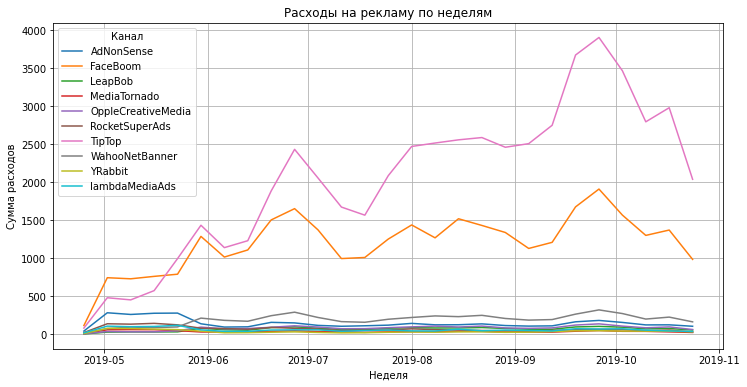

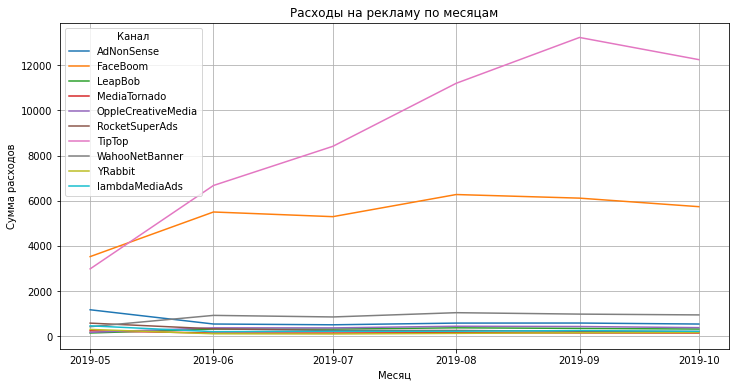

In [28]:
#график для недельных данных
plt.figure(figsize=(12, 6))
for channel in ad_costs_week.columns:
    plt.plot(ad_costs_week.index, ad_costs_week[channel], label=channel)
plt.title('Расходы на рекламу по неделям')
plt.xlabel('Неделя')
plt.ylabel('Сумма расходов')
plt.legend(title='Канал')
plt.grid(True)
plt.show()

#график для месячных данных
plt.figure(figsize=(12, 6))
for channel in ad_costs_month.columns:
    plt.plot(ad_costs_month.index, ad_costs_month[channel], label=channel)
plt.title('Расходы на рекламу по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма расходов')
plt.legend(title='Канал')
plt.grid(True)
plt.show()

In [29]:
# стоимость привлечения одного пользователя (CAC) из каждого источника
cac_by_channel = profiles.groupby('channel')['acquisition_cost'].mean().reset_index().sort_values(by='acquisition_cost', ascending=False)
cac_by_channel

,channel,acquisition_cost
6,TipTop,2.799003
1,FaceBoom,1.113286
0,AdNonSense,1.008054
9,lambdaMediaAds,0.724802
7,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
4,OppleCreativeMedia,0.250000
8,YRabbit,0.218975
3,MediaTornado,0.218717
2,LeapBob,0.210172


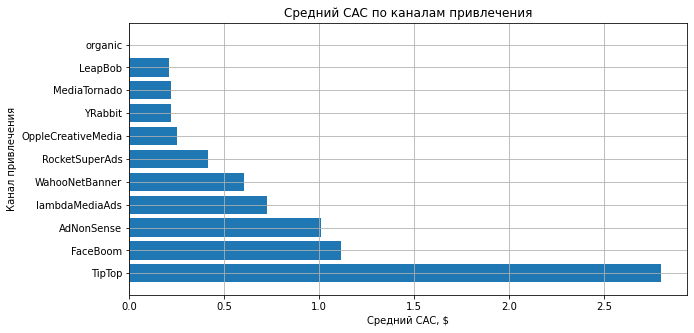

In [30]:
plt.figure(figsize=(10, 5))
plt.barh(cac_by_channel['channel'], cac_by_channel['acquisition_cost'])
plt.xlabel('Средний CAC, $')
plt.ylabel('Канал привлечения')
plt.title('Средний CAC по каналам привлечения')
plt.grid(True)
plt.show()


In [31]:
print(f' Средний CAC на одного пользователя для всего проекта = {round(profiles["acquisition_cost"].mean(), 2)}')


 Средний CAC на одного пользователя для всего проекта = 0.7


**Выводы**:

- Общая сумма расходов на маркетинг 105497 долларов;
- Дороже всего стоила реклама у TipTop (54751) и FaceBoom (32445) - это примерно 82% от всей потраченной суммы;
- Динамика расходов на рекламу по TipTop показывает резкий рост вложений по недельному срезу и такое же снижение, а расходы по месяцам показывают постепенный рост и плавное снижение;
- Расходы по FaceBoom держится от 1000 до 2000 по неделям и стабильное вложение по месяцам;
-  Средний CAC на одного пользователя для всего проекта = 0.7.


**Окупаемость рекламы**



Уберем органических пользователей, так как затрат на них не было, ведь мы анализируем пользователей, пришедших с платных каналов.

In [32]:
profiles = profiles.query('channel != "organic"')


In [33]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

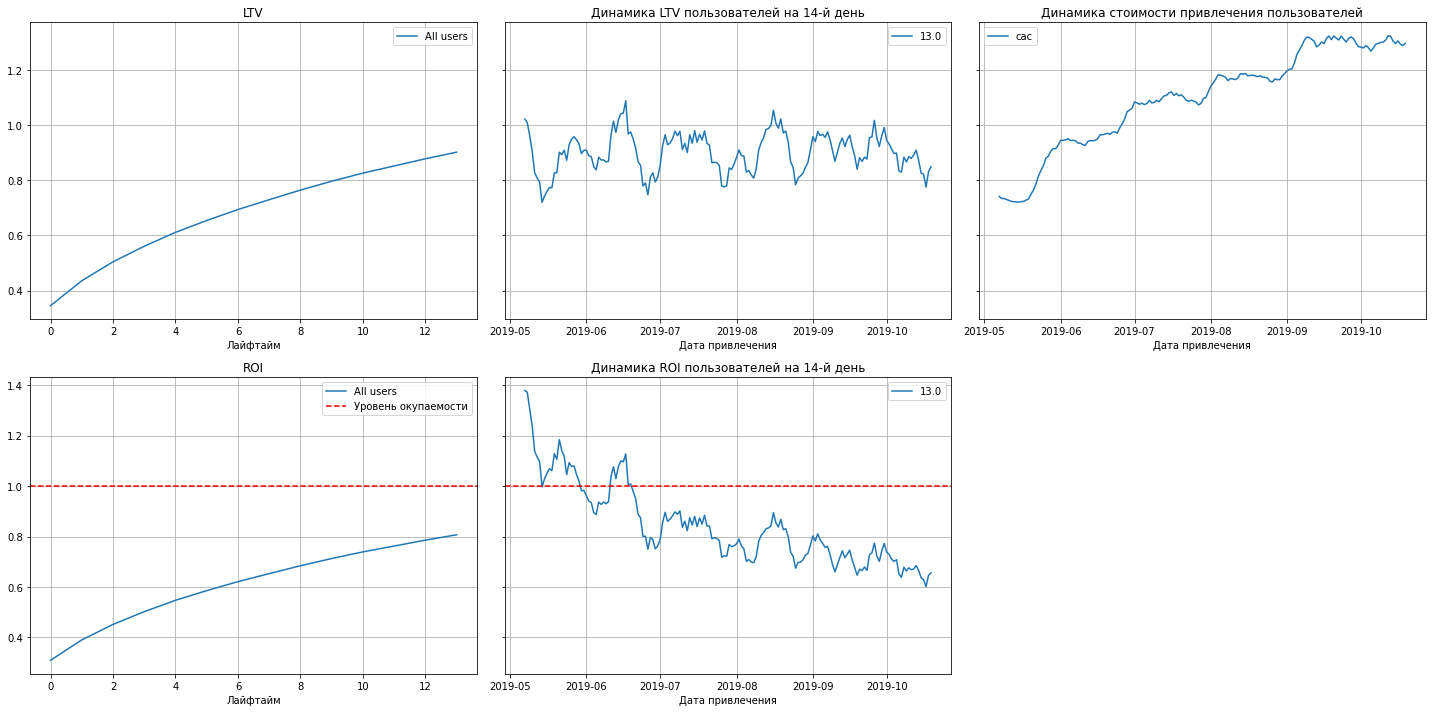

In [34]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7) 


Выводы:
- Привлечение пользователей только растет с половины мая до конца исследуемого периода.
- LTV держится примерно на одном уровне, значит, дело не в ухудшении качества пользователей.
- Реклама не окупается.
- Чем больше тратится на рекламу, тем меньше окупаемость.

**Общая окупаемость рекламы с разбивкой по странам**

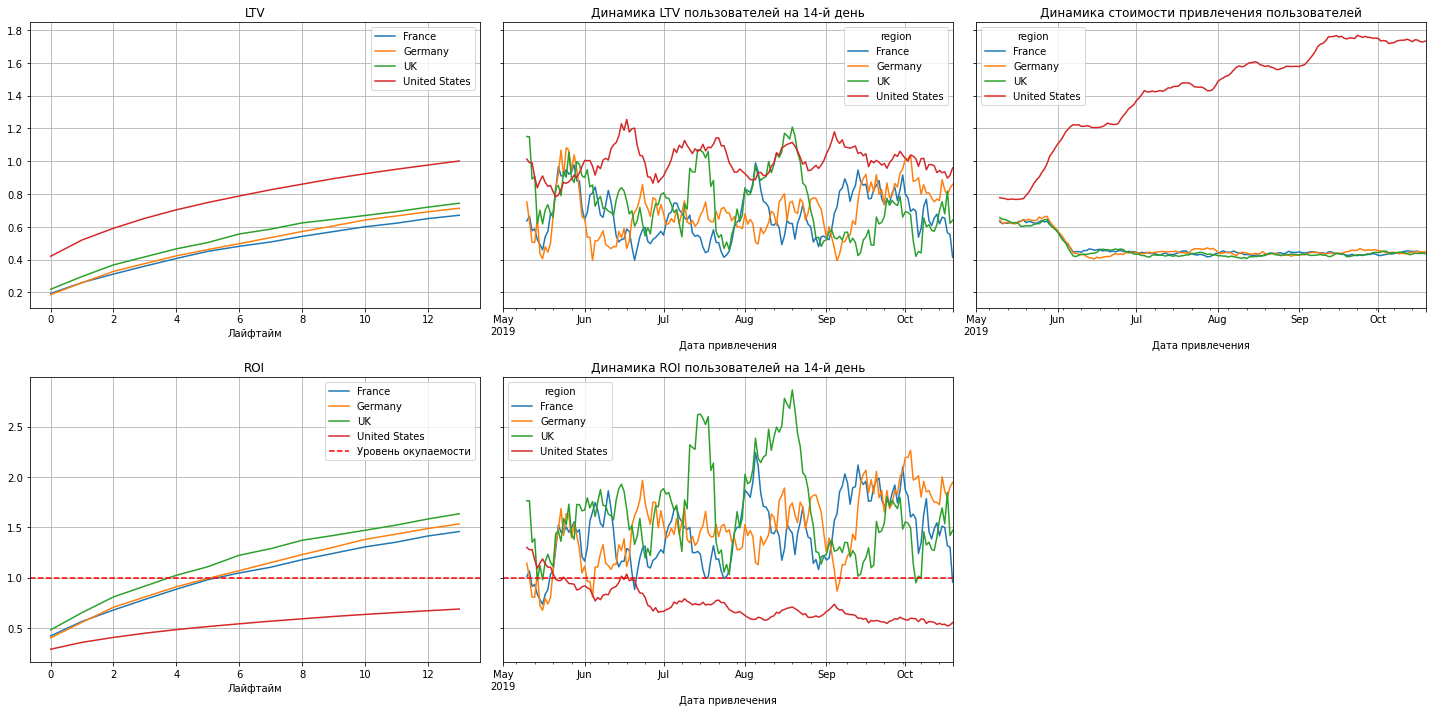

In [35]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=10
) 

Выводы:
- LTV выше в США, чем в других странах.
- Стоимость привлечения сильно выше в США.
- Но реклама не окупается именно в США, несмотря на расходы. 
- В динамике окупаемость падает.


**Общая окупаемость рекламы с разбивкой по каналам**

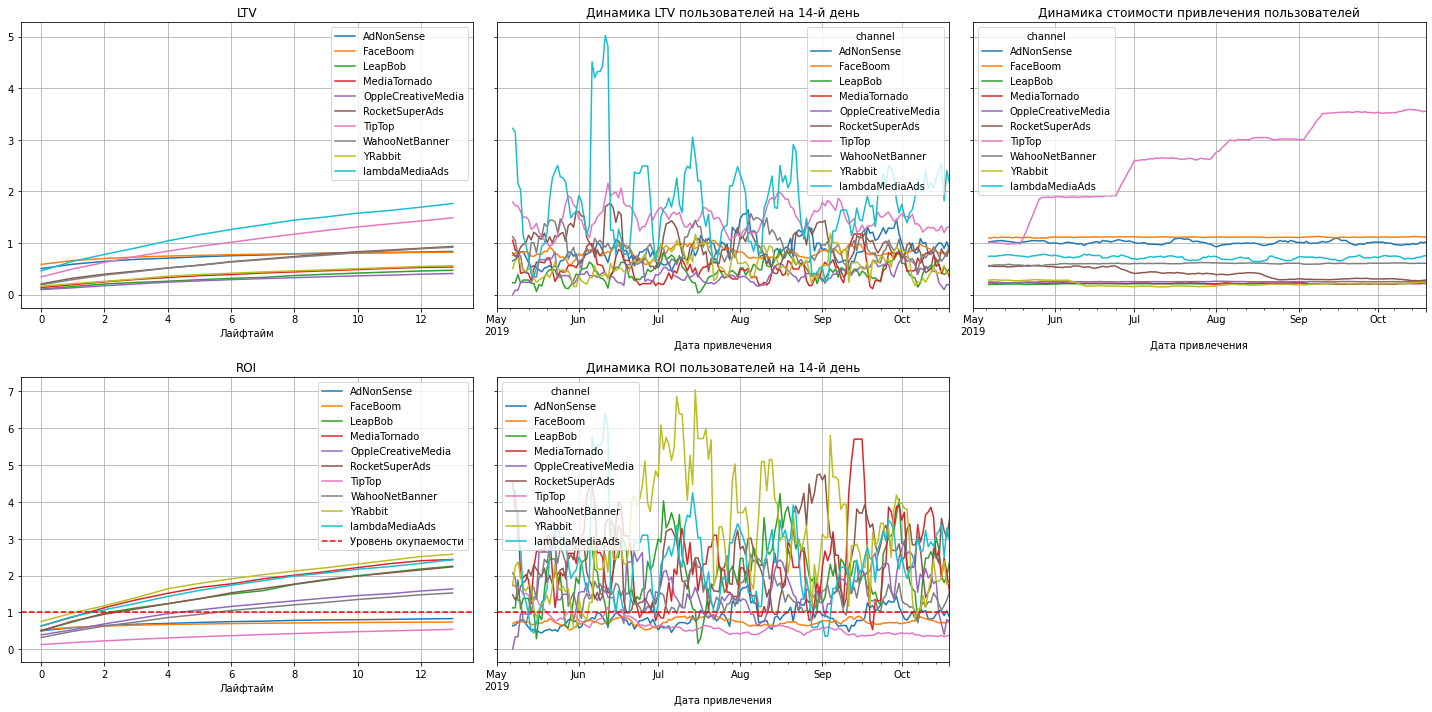

In [36]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
) 

Выводы:
- LTV у источников lambdaMediaAds и TipTop на хорошем уровне. 
- Компания начала много вкладывать в TipTop с середины мая. Показатель САС растет, пока другие стабильно на одном уровне.
- TipTop, FaceBoom не окупаются.
- YRabbit на первом месте по окупаемости.
- Наблюдаются скачки в ROI у RocketSuperAds и MediaTornado.

**Общая окупаемость рекламы с разбивкой по устройствам**

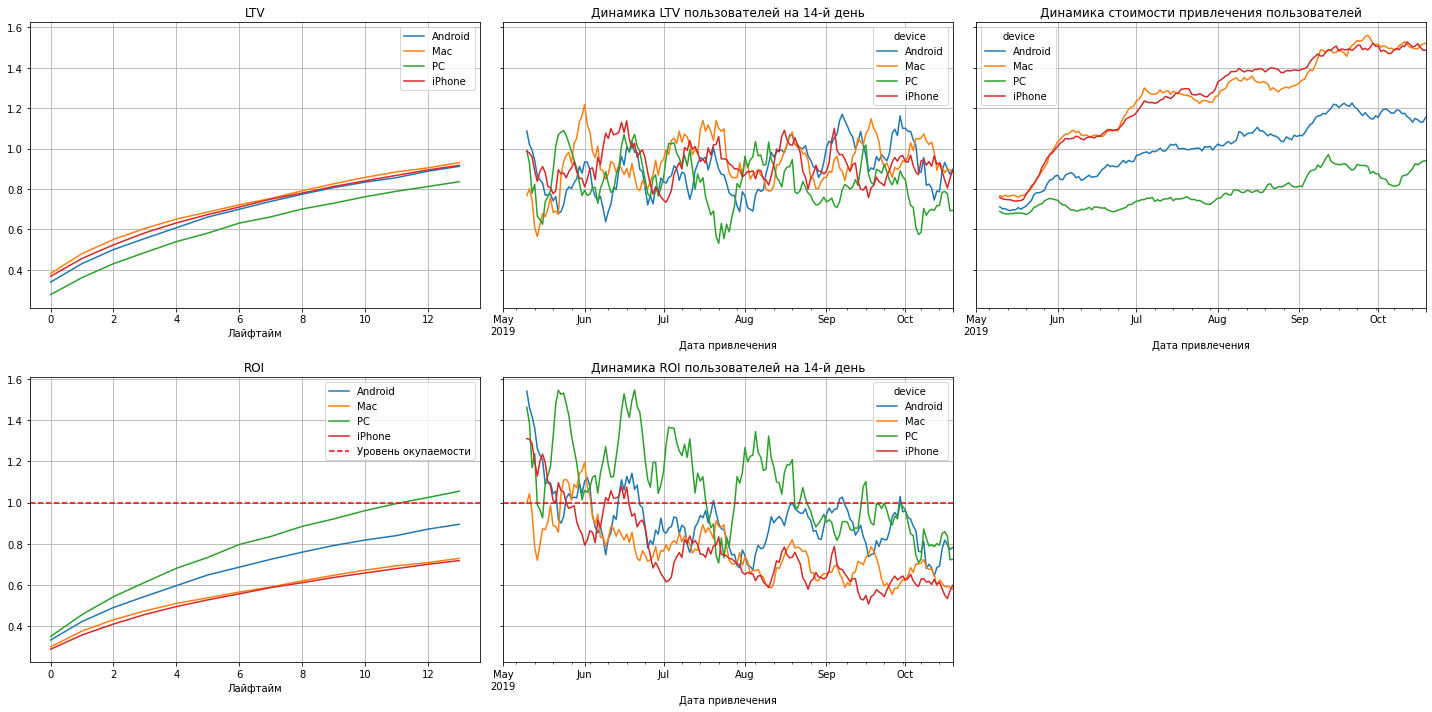

In [37]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=10
) 

Выводы:
- LTV стабильно растет, PC на последнем месте.
- Стоимость пользователей у Mac и iPhone дороже всех и плюс-минус почти одинаково.
- Окупается только PC. Mac и iPhone на 14-й день находятся на уровне 70-80%.
- Android на втором месте по окупаемости.
- В динамике ROI постепенно падает на всех устройствах.


**Графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам**

**Конверсия и удержание по устройствам**

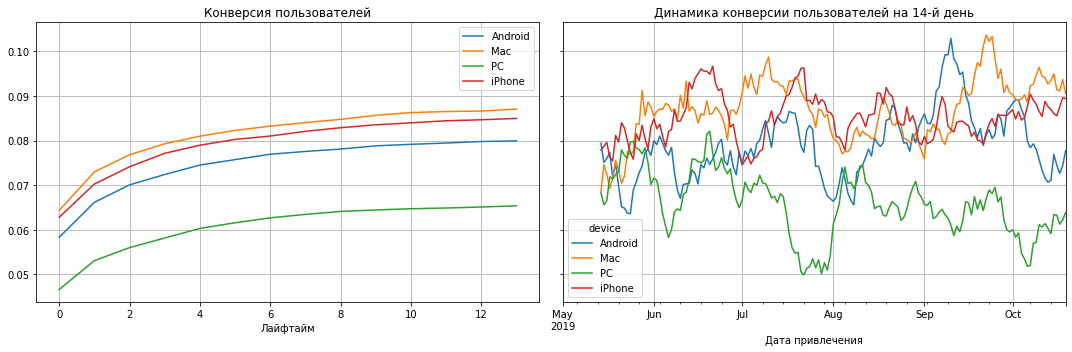

In [38]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия стабильно нормальная. На первом месте так же Mac и iPhone. Посмотрим удержание с разбивкой по устройствам.

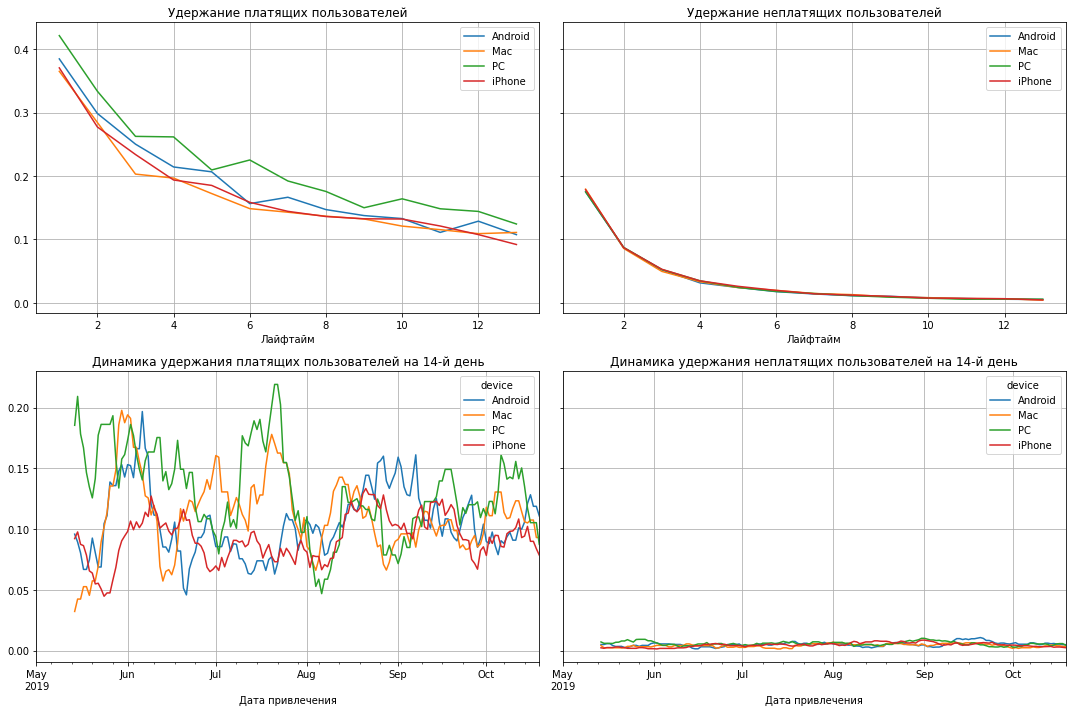

In [39]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Выводы:
- Платящие пользователи плохо удерживаются.
- Показатели удержания неплатящих еще хуже. 
- Тут скорее всего проблема в удержании всех пользователей. Возможно, просто перестают пользоваться приложением.


**Конверсия и удержание по странам**

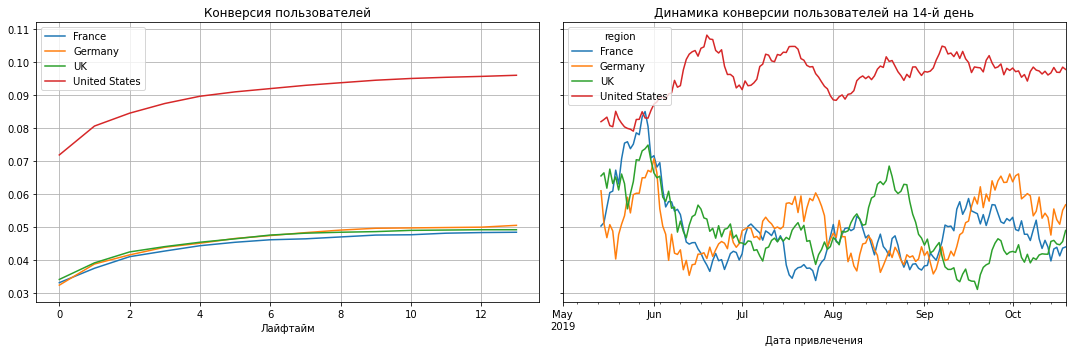

In [40]:
# смотрим конверсию с разбивкой по регионам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

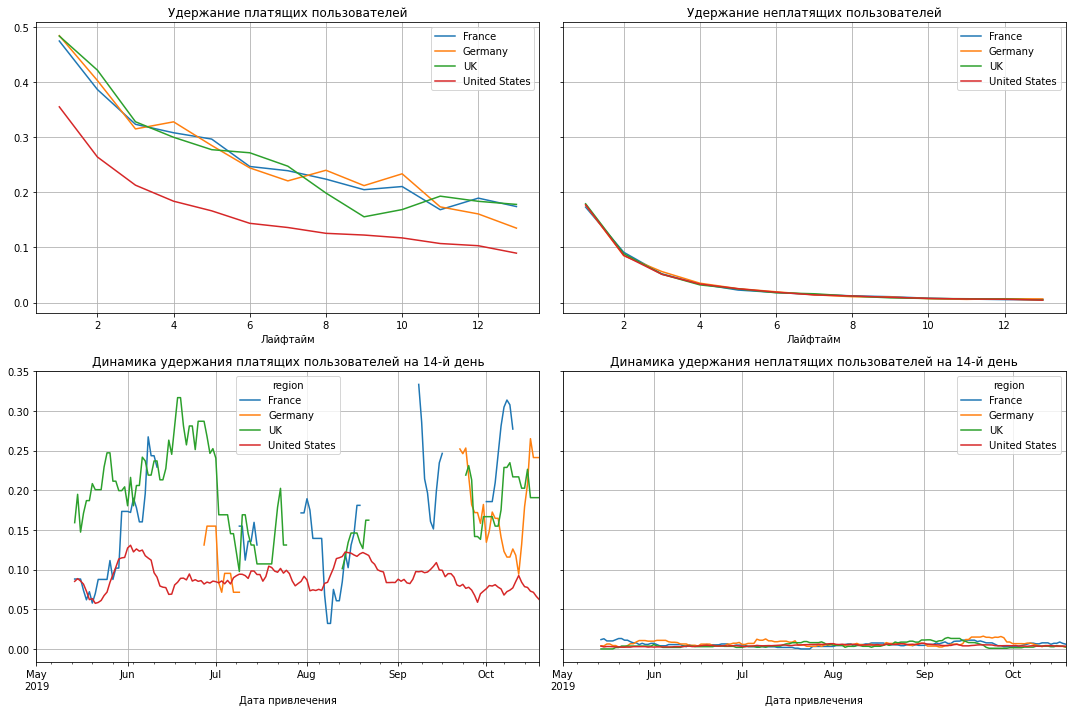

In [41]:
# смотрим удержание с разбивкой по регионам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Выводы:
- США на первом месте с большим отрывом по конверсии.
- Но самое низкое удержание платящих пользователей.
- Покзатели остальных стран стабильны и примерно на одном уровне.

**Конверсия и удержание по каналам**

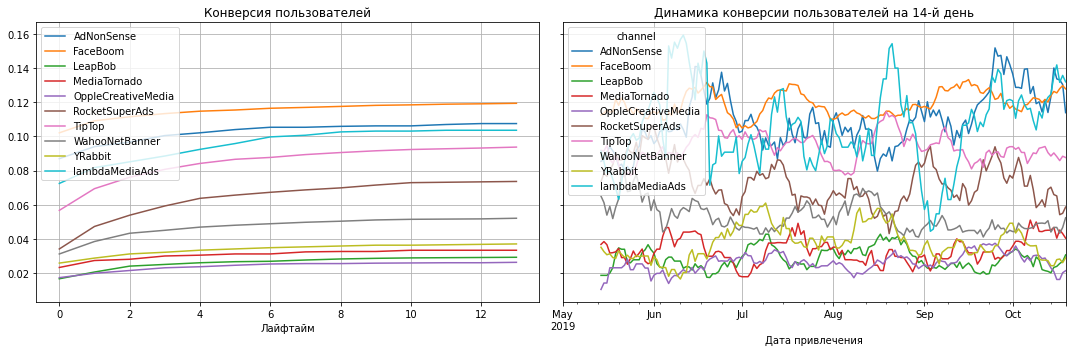

In [42]:
# смотрим конверсию с разбивкой по каналам
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

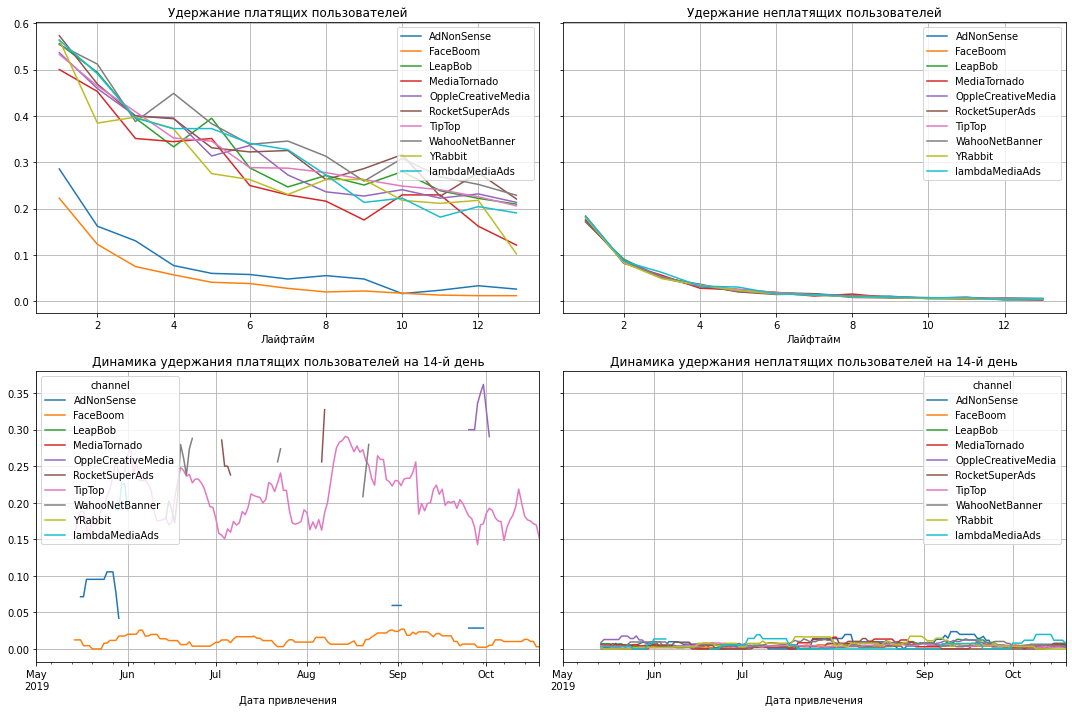

In [43]:
# смотрим удержание с разбивкой по каналам привлечения
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Выводы:
- По конверсии FaceBoom на первом месте. На втором и третьем - AdNonSense и lambdaMediaAds.
- FaceBoom и AdNonSense самые низкие показатели удержания платящих юзеров.

**Окупаемость рекламы**

- В целом реклама не окупается.
- В разрезе стран США имеет самый низкий уровень окупаемости, но большая конверсия и низкое удержание.
- Из каналов у TipTop аномально высокие показатели привлечения пользователей.
- Несмотря на вложения, TipTop не окупает себя.



Выясним причину низкой окупаемости в США. Смотрим на продолжительность использования приложения.

In [44]:
visits['duration'] = (visits['session_end'] - visits['session_start']).dt.seconds
visits.query('channel != "organic"').groupby('region')['duration'].describe().sort_values(by='count', ascending=False)


,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
United States,134471.0,1807.702969,1815.000793,0.0,522.0,1247.0,2502.00,22257.0
UK,24098.0,1787.255955,1786.840168,0.0,515.0,1246.0,2459.75,19637.0
France,23332.0,1777.856335,1777.502398,0.0,515.0,1224.0,2486.00,19249.0
Germany,20240.0,1780.226779,1762.710591,0.0,518.0,1238.0,2480.00,17743.0


В США длительность использования приложения выше на 15-17%, чем в других странах. Стоит исследовать этот момент, чтобы узнать причины. Возможно, в США больше развиты современные инструменты для продвижения или конкуренции больше, также, возможно, в этом регионе более развиты социальные сети, что способствует широкому использованию приложений для маркетинга.


# Общий вывод

Нам даны 3 файла, где мы поменяли регистр названий столбцов, добавили нижнее подчеркивание для удобства.
Поменяли нужные типы на данных на date.
Дубликатов нет, так же, как и пропусков.
Создали функции для создания профилей, для подсчета Retention Rate, конверсии, LTV, а также функции для сглаживания данных, для построения графика Retention Rate, конверсии, для визуализации LTV и ROI. 

**Исследовательский анализ данных:**
- Дата привлечения пользователей: 2019-05-01 - 2019-10-27.
- Каждый клиент в среднем приносит 24 долларов.
- Большинство пользователей и % платящих из США (100тыс. юзеров и 6% платящих).
- Германия на втором месте по доле платящих (4%), но чуть меньше пользователей, чем в Великобритании.
- Франция на последнем месте по обоим признакам.
- Большинство пользователей используют IPhone (54479), но платящих больше через Mac (6.364423 %)
- Больше всего прибыли приносит источник FaceBoom (12.204914 %), Также он на втором месте по количеству пользователей (29144) после органических (56439). Tip Top на третьем месте по количеству, но на четвертом по доле платящих (9.600736 %).

**Маркетинг:**
- Общая сумма расходов на маркетинг:105497 долларов
- Дороже всего стоила реклама у TipTop (54751) и FaceBoom (32445) - это примерно 82% от всей потраченной суммы.
- Средний CAC на одного пользователя для всего проекта = 0.7.
- Расходы по FaceBoom держится от 1000 до 2000 по неделям и стабильное вложение по месяцам;


**Оценка покупаемости рекламы:**

**Общая окупаемость:**
- LTV стабильно растет.
- Стоимость привлечения резко возросла в июне (связано с вложениями в TipTop).
- В динамике ROI идет на снижение именно с июня после всех вложений.
- Реклама не окупается, несмотря на инвестиции в рекламу. 

**С разбивкой по странам:**
- LTV чуть выше в США, чем в других странах.
- Стоимость привлечения сильно выше в США.
- Но реклама не окупается именно в США, несмотря на расходы.
- В динамике окупаемость только падает.

**С разбивкой по каналам:**

- LTV у источников lambdaMediaAds и TipTop на хорошем уровне.
- Компания начала много вкладывать в TipTop с середины мая. Показатель САС растет, пока другие стабильно на одном уровне.
- TipTop, FaceBoom не окупаются.
- YRabbit на первом месте по окупаемости.
- Наблюдаются скачки в ROI у RocketSuperAds и MediaTornado.

**С разбивкой по устройствам:**
- LTV стабильно растет, PC на последнем месте.
- Стоимость пользователей у Mac и iPhone дороже всех и плюс-минус почти одинаково.
- Окупается только PC. Mac и iPhone на 14-й день находятся на уровне 70-80%.
- Android на втором месте по окупаемости.
- В динамике ROI постепенно падает на всех устройствах.

**Конверсия и удержание по устройствам**
- Платящие пользователи плохо удерживаются.
- Показатели удержания неплатящих еще хуже.
- Тут скорее всего проблема в удержании всех пользователей. Возможно, просто перестают пользоваться приложением.

**Конверсия и удержание по странам**
- США на первом месте с большим отрывом по конверсии.
- Но самое низкое удержание платящих пользователей.
- Показатели остальных стран стабильны и примерно на одном уровне.

**Конверсия и удержание по каналам**
- По конверсии FaceBoom на первом месте. На втором и третьем - AdNonSense и lambdaMediaAds.
- FaceBoom и AdNonSense самые низкие показатели удержания платящих юзеров.

**Общий вывод и рекомендации:**
1. Причины неэффективности привлечения пользователей:
- Неоправданно большие вложения в TipTop, которые не окупаются.
- Низкое удержания пользователей на всех устройствах, в США, и каналов AdNonSense и FaceBoom, несмотря на выскокую конверсию.
- У канала TipTop хорошее удержание, но мало пользователей.


2. Рекомендации для рекламного отдела:
- Вкладываться в каналы, которые показывают хорошие результаты уже сейчас. Нужно улучшать то, что есть. Посоветовала бы присмотреться к каналу lambdaMediaAds и YRabbit. У них LTV самый высокий и неплохая окупаемость. Также хорошие результаты у YRabbit.
- Проанализировать низкое удержание пользователей по всем устройствам и в США, где пользователи быстро перестают пользоваться приложением. Улучшить маркетинг в этом регионе и, возможно, запустить акции для удержания. 
- Также проанализировать длительность сессий в США. 


